In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="darkgrid")


In [12]:
import os
print(os.getcwd())


c:\Users\Maya\Desktop\DEPAUL\prosperity3\src\analysis


In [16]:
# Load the CSV file
df = pd.read_csv('C:\\Users\\Maya\\Desktop\\DEPAUL\\prosperity3\\src\\data\\round1\\round1_11.csv', delimiter=';')

# Display the first few rows of the dataset
df.head()


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,KELP,2028,23,NaN,NaN,NaN,NaN,2032,23,NaN,NaN,NaN,NaN,2030.0,0.0
2,0,0,SQUID_INK,1968,23,NaN,NaN,NaN,NaN,1971,23,NaN,NaN,NaN,NaN,1969.5,0.0
3,0,100,SQUID_INK,1970,1,1969.0,2.0,1967.0,22.0,1971,22,NaN,NaN,NaN,NaN,1970.5,0.0
4,0,100,KELP,2031,1,2030.0,2.0,2028.0,22.0,2032,22,NaN,NaN,NaN,NaN,2031.5,0.0


In [18]:
# Check the structure of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Get basic statistics for the numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              3000 non-null   int64  
 1   timestamp        3000 non-null   int64  
 2   product          3000 non-null   object 
 3   bid_price_1      3000 non-null   int64  
 4   bid_volume_1     3000 non-null   int64  
 5   bid_price_2      1196 non-null   float64
 6   bid_volume_2     1196 non-null   float64
 7   bid_price_3      202 non-null    float64
 8   bid_volume_3     202 non-null    float64
 9   ask_price_1      3000 non-null   int64  
 10  ask_volume_1     3000 non-null   int64  
 11  ask_price_2      1194 non-null   float64
 12  ask_volume_2     1194 non-null   float64
 13  ask_price_3      230 non-null    float64
 14  ask_volume_3     230 non-null    float64
 15  mid_price        3000 non-null   float64
 16  profit_and_loss  3000 non-null   float64
dtypes: float64(10)

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,3000.0,3000.000000,3000.000000,3000.000000,1196.000000,1196.000000,202.000000,202.000000,3000.000000,3000.000000,1194.000000,1194.000000,230.000000,230.000000,3000.000000,3000.000000
mean,0.0,49950.000000,4662.626333,16.623667,6999.345318,21.334448,8607.826733,23.227723,4666.656000,16.629667,6933.293132,20.661642,8507.865217,22.856522,4664.641167,-159.793977
std,0.0,28872.311479,3772.471934,11.842781,3872.861362,9.245522,3037.875307,6.893477,3774.340719,11.499997,3895.185090,9.547135,3128.749404,6.969135,3773.406239,500.306648
min,0.0,0.000000,1938.000000,1.000000,1941.000000,1.000000,1947.000000,1.000000,1941.000000,1.000000,1946.000000,1.000000,1948.000000,1.000000,1939.500000,-1146.546875
25%,0.0,24975.000000,1970.000000,2.000000,2029.000000,21.000000,9995.000000,21.250000,1973.000000,2.000000,2032.000000,21.000000,10004.000000,21.000000,1971.500000,-623.654297
50%,0.0,49950.000000,2029.000000,22.000000,9995.000000,24.000000,9995.000000,24.500000,2032.000000,22.000000,10004.000000,24.000000,10005.000000,24.000000,2030.500000,-186.312500
75%,0.0,74925.000000,9995.000000,27.000000,9995.000000,27.000000,9995.000000,28.000000,10002.000000,26.000000,10005.000000,27.000000,10005.000000,27.000000,9999.000000,224.000000
max,0.0,99900.000000,10002.000000,39.000000,10000.000000,38.000000,9998.000000,30.000000,10005.000000,32.000000,10005.000000,32.000000,10005.000000,31.000000,10003.500000,848.000000


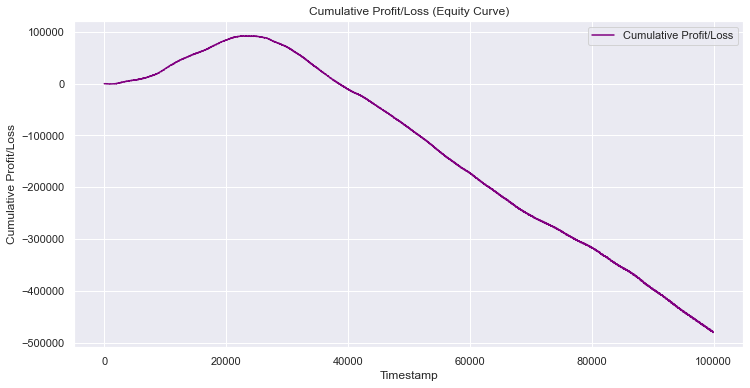

In [19]:
# Calculate cumulative profit/loss
df['cumulative_profit'] = df['profit_and_loss'].cumsum()

# Display the first few rows with cumulative profit
df[['timestamp', 'cumulative_profit']].head()

# Plot the cumulative profit over time (equity curve)
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['cumulative_profit'], label='Cumulative Profit/Loss', color='purple')
plt.title("Cumulative Profit/Loss (Equity Curve)")
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Profit/Loss')
plt.legend()
plt.show()


In [20]:
# Calculate win rate (percentage of winning trades)
win_rate = len(df[df['profit_and_loss'] > 0]) / len(df) * 100
print(f"Win Rate: {win_rate:.2f}%")


Win Rate: 40.77%


In [21]:
# Calculate drawdown
df['running_max'] = df['cumulative_profit'].cummax()
df['drawdown'] = df['cumulative_profit'] - df['running_max']

# Calculate the maximum drawdown
max_drawdown = df['drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown:.2f}")


Maximum Drawdown: -572416.77


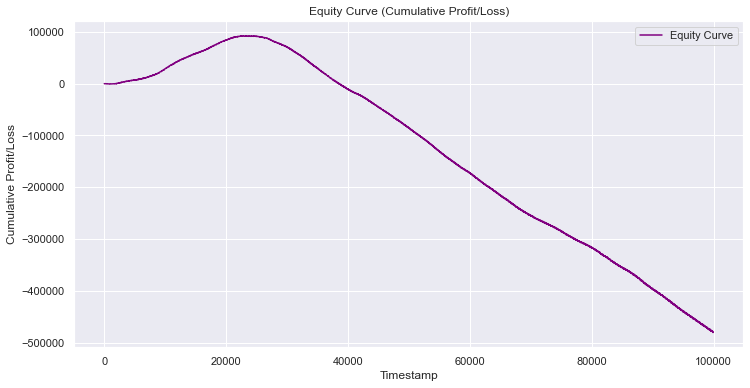

In [22]:
# Plot the cumulative profit (equity curve)
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['cumulative_profit'], label='Equity Curve', color='purple')
plt.title("Equity Curve (Cumulative Profit/Loss)")
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Profit/Loss')
plt.legend()
plt.show()


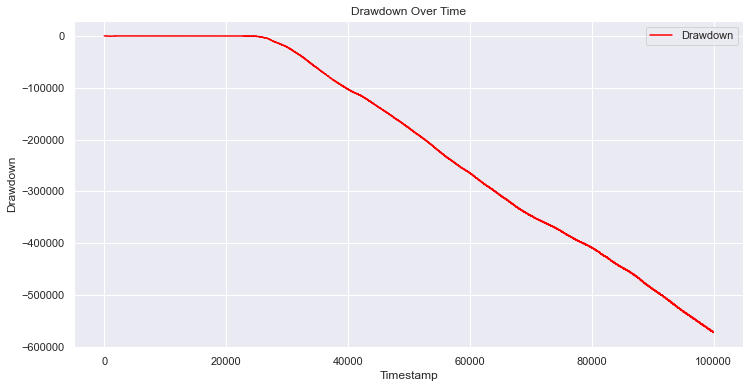

In [23]:
# Plot the drawdown over time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['drawdown'], label='Drawdown', color='red')
plt.title("Drawdown Over Time")
plt.xlabel('Timestamp')
plt.ylabel('Drawdown')
plt.legend()
plt.show()


In [24]:
# Calculate profit factor
total_profit = df[df['profit_and_loss'] > 0]['profit_and_loss'].sum()
total_loss = df[df['profit_and_loss'] < 0]['profit_and_loss'].sum()

profit_factor = total_profit / abs(total_loss) if total_loss != 0 else np.nan
print(f"Profit Factor: {profit_factor:.2f}")


Profit Factor: 0.46


In [25]:
# Risk-to-Reward Ratio (Total Profit / Total Loss)
risk_to_reward_ratio = total_profit / abs(total_loss) if total_loss != 0 else np.nan
print(f"Risk-to-Reward Ratio: {risk_to_reward_ratio:.2f}")


Risk-to-Reward Ratio: 0.46
